## Sample Analysis

In [4]:
import pickle
with open('ROMS_26yr_daydic.pkl', 'rb') as file:
    daydic = pickle.load(file)

with open('ROMS_26yr_eddies.pkl', 'rb') as file:
    eddies = pickle.load(file)

# with open('/srv/scratch/z5297792/Sample/sample_data.pkl', 'rb') as file:
#     sample_data1 = pickle.load(file)
# print(sample_data1.keys())

# with open('/srv/scratch/z5297792/Sample/500plus_sample_data.pkl', 'rb') as file:
#     sample_data2 = pickle.load(file)
# print(sample_data2.keys())

with open('/srv/scratch/z5297792/Sample/frontier_sample_data.pkl', 'rb') as file:
    frontier_sample_data = pickle.load(file)
the_frontier_eddies = list(frontier_sample_data.keys())
print(the_frontier_eddies)


['Eddy790', 'Eddy110', 'Eddy134', 'Eddy775']


In [5]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import time
from matplotlib.patches import Ellipse

fname = '/srv/scratch/z3533156/26year_BRAN2020/outer_avg_01461.nc'
dataset = nc.Dataset(fname)
lon_rho  = dataset.variables['lon_rho'][:]
lon_rho = np.transpose(lon_rho, axes=(1, 0))
lat_rho  = dataset.variables['lat_rho'][:]
lat_rho = np.transpose(lat_rho, axes=(1, 0))
f  = dataset.variables['f'][:]
f = np.transpose(f, axes=(1, 0))
h = dataset.variables['h'][:]
h = np.transpose(h, axes=(1, 0))
z_r = np.load('/home/z5297792/UNSW-MRes/MRes/z_r/z_r.npy')
z_r = np.transpose(z_r, (1, 2, 0))
temp_ave = np.load('/srv/scratch/z5297792/Climatology/temp_ave.npy')
CurSpeed_ave = np.load('/srv/scratch/z5297792/Climatology/CurSpeed_ave.npy')

import re
def extract_number(s):
    match = re.search(r'\d+', s)
    return int(match.group()) if match else None

eddy = 'Eddy22' # AE no-tilt # good \
eddy = 'Eddy110' # AE tilt # good off my own analysis \
eddy = 'Eddy134' # CE non-tilt # best \
eddy = 'Eddy133' # CE tilt \
\
eddy = 'Eddy790' # AE non-tilt # best \
eddy = 'Eddy761' # CE non-tilt # not bad \
eddy = 'Eddy749' # CE tilt # good \
eddy = 'Eddy775' # CE tilt # best \
\
The Sample Frontiers: \
\
AE790 no-tilt \
AE110 tilt \
CE134 no-tilt \
CE775 tilt 




## The Frontiers

In [6]:
# cap everything at COWs depth
d_df = pd.DataFrame()
for eddy in the_frontier_eddies:
    for t in range(30):
        df = frontier_sample_data[eddy]['T'+str(t)]['COW']['x']
        d_df['T'+str(t)] = [df.isna().idxmax() if df.isna().any() else len(df)]


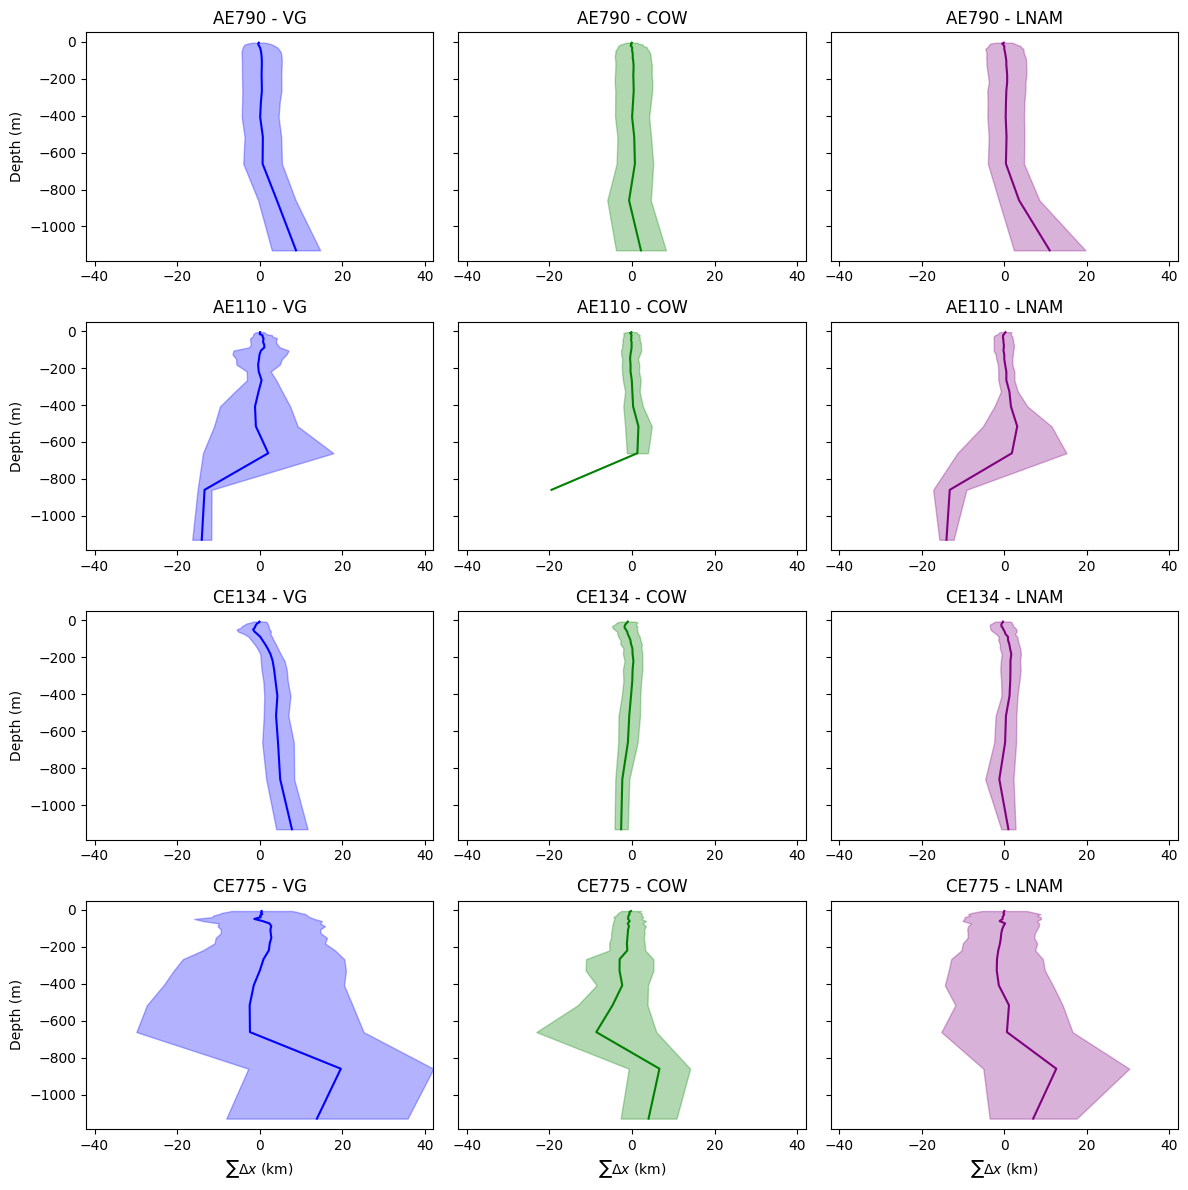

In [7]:
method_colors = {'VG': 'blue', 'COW': 'green', 'LNAM': 'purple'}

fig, axes = plt.subplots(4, 3, figsize=(12, 12), sharey=True)

xmin = xmax = 0
for i, eddy in enumerate(the_frontier_eddies):
    for j, (method, color) in enumerate(method_colors.items()):
        ax = axes[i, j]
        x_df = pd.DataFrame({f'T{t}': frontier_sample_data[eddy][f'T{t}'][method].iloc[:d_df['T'+str(t)][0]]['x'] - frontier_sample_data[eddy][f'T{t}'][method].iloc[0]['x'] for t in range(30)})
        x_mean, x_std = x_df.diff().cumsum().mean(axis=1)/1000, x_df.diff().cumsum().std(axis=1)/1000
        ax.plot(x_mean, z_r[150, 150, :len(x_mean)], color=color)
        ax.fill_betweenx(z_r[150, 150, :len(x_mean)], x_mean - x_std, x_mean + x_std, color=color, alpha=0.3)
        cyc = 'AE' if eddies[eddy].iloc[0]['Vort'] > 0 else 'CE'
        ax.set_title(cyc + str(extract_number(eddy)) + ' - ' + method)
        if j == 0: ax.set_ylabel("Depth (m)")
        if i == 3: ax.set_xlabel(r"$\sum\Delta x$ (km)")

        xmin = min(np.nanmin(x_mean - x_std), xmin)
        xmax = max(np.nanmax(x_mean + x_std), xmax)

# Set common x-axis limits
xabs = max(abs(xmin), abs(xmax))
x_lim = [-xabs, xabs]
for ax in axes.flat:
    ax.set_xlim(x_lim)

plt.tight_layout()
plt.show()

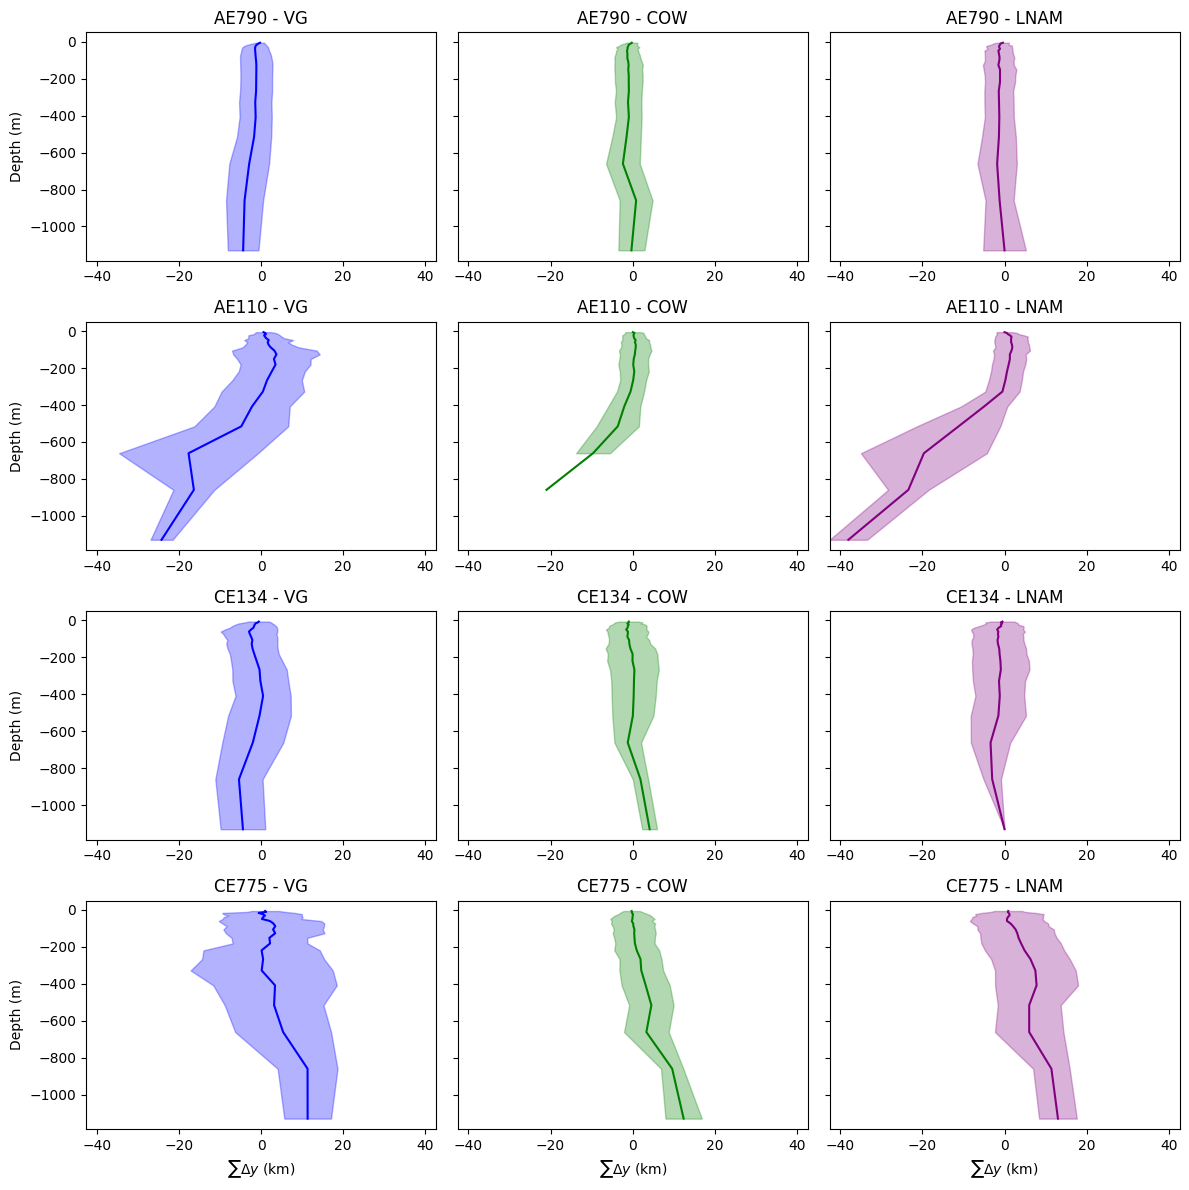

In [9]:
method_colors = {'VG': 'blue', 'COW': 'green', 'LNAM': 'purple'}

fig, axes = plt.subplots(4, 3, figsize=(12, 12), sharey=True)

xmin = xmax = 0
for i, eddy in enumerate(the_frontier_eddies):
    for j, (method, color) in enumerate(method_colors.items()):
        ax = axes[i, j]
        y_df = pd.DataFrame({f'T{t}': frontier_sample_data[eddy][f'T{t}'][method].iloc[:d_df['T'+str(t)][0]]['y'] - frontier_sample_data[eddy][f'T{t}'][method].iloc[0]['y'] for t in range(30)})
        y_mean, y_std = y_df.diff().cumsum().mean(axis=1)/1000, y_df.diff().cumsum().std(axis=1)/1000
        ax.plot(y_mean, z_r[150, 150, :len(y_mean)], color=color)
        ax.fill_betweenx(z_r[150, 150, :len(y_mean)], y_mean - y_std, y_mean + y_std, color=color, alpha=0.3)
        cyc = 'AE' if eddies[eddy].iloc[0]['Vort'] > 0 else 'CE'
        ax.set_title(cyc + str(extract_number(eddy)) + ' - ' + method)
        if j == 0: ax.set_ylabel("Depth (m)")
        if i == 3: ax.set_xlabel(r"$\sum\Delta y$ (km)")

        xmin = min(np.nanmin(y_mean - y_std), xmin)
        xmax = max(np.nanmax(y_mean + y_std), xmax)

# Set common x-axis limits
xabs = max(abs(xmin), abs(xmax))
x_lim = [-xabs, xabs]
for ax in axes.flat:
    ax.set_xlim(x_lim)

plt.tight_layout()
plt.show()

## Covariance Analysis

In [156]:
def normalize_list(input_list):
    total_sum = sum(input_list)
    # Prevent division by zero if the total_sum is 0
    if total_sum == 0:
        return [0] * len(input_list)  # Return a list of zeros if the sum is zero
    normalized_list = [x / total_sum for x in input_list]
    return normalized_list

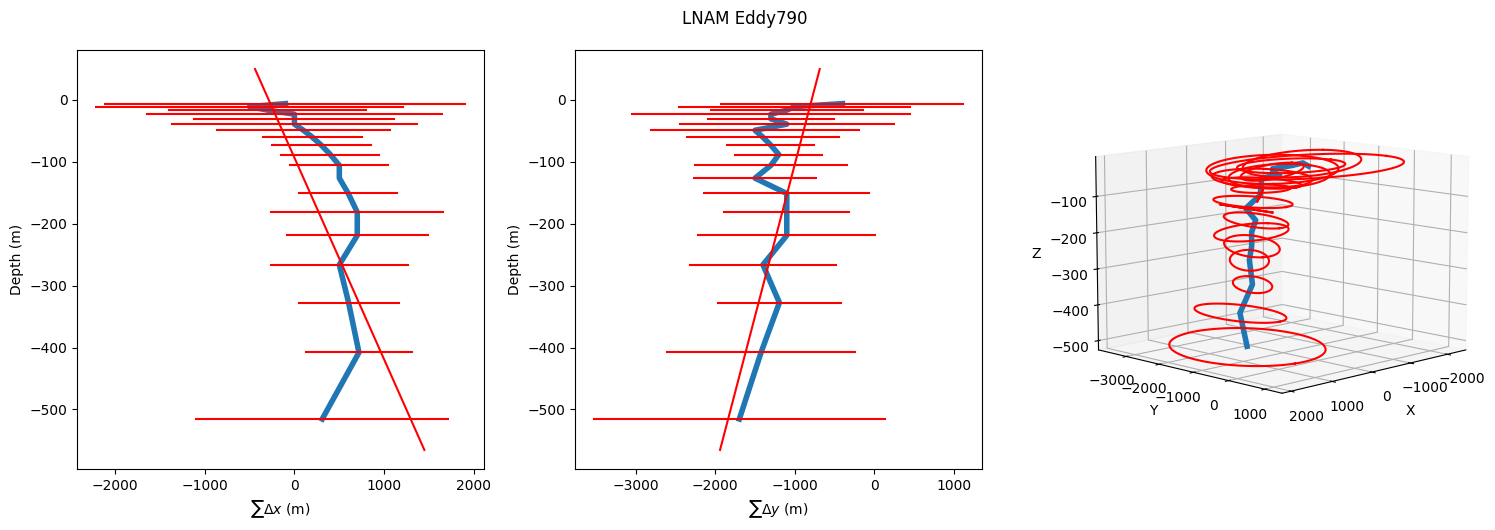

In [166]:
from scipy.interpolate import UnivariateSpline

# cap all depth to COWs depth
d_df = pd.DataFrame()
for eddy in the_frontier_eddies:
    for t in range(30):
        df = frontier_sample_data[eddy]['T'+str(t)]['COW']['x']
        d_df['T'+str(t)] = [df.isna().idxmax() if df.isna().any() else len(df)]

# choose eddy
eddy = the_frontier_eddies[0]

# create x and y dataframes 
x_df = pd.DataFrame()
y_df = pd.DataFrame()
for t in range(30):
    x_df['T'+str(t)] = frontier_sample_data[eddy]['T'+str(t)][method].iloc[:d_df['T'+str(t)][0]]['x'] - frontier_sample_data[eddy]['T'+str(t)][method].iloc[0]['x']
    y_df['T'+str(t)] = frontier_sample_data[eddy]['T'+str(t)][method].iloc[:d_df['T'+str(t)][0]]['y'] - frontier_sample_data[eddy]['T'+str(t)][method].iloc[0]['y']

# calcualte covariance matrices
Cz = np.full((2, 2, x_df.shape[0]), np.nan)
for k in range(1, x_df.shape[0]):
    x = x_df.diff().iloc[k]
    x = x.loc[~np.isnan(x)]
    y = y_df.diff().iloc[k]
    y = y.loc[~np.isnan(y)]
    Cz[:, :, k] = np.cov(np.stack([x.values, y.values]))

# plot 
x = x_df.diff().mean(axis=1).cumsum()
y = y_df.diff().mean(axis=1).cumsum()
fig = plt.figure(figsize=(15, 5))
ax = [fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133, projection='3d')]
ax[0].plot(x, z_r[150, 150, :len(x)], linewidth=4)
ax[1].plot(y, z_r[150, 150, :len(x)], linewidth=4)
ax[2].plot(x, y, z_r[150, 150, :len(x)], linewidth=4)
ellipse_areas = []
for k in range(len(x)):
    C = Cz[:, :, k]
    eigvals, eigvecs = np.linalg.eigh(C)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    angle = np.arctan2(eigvecs[1, 0], eigvecs[0, 0])
    axis_lengths = np.sqrt(eigvals)
    ellipse_areas.append(np.pi * axis_lengths[0] * axis_lengths[1]) 
    t = np.linspace(0, 2 * np.pi, 100)
    ellipse_points = np.array([np.cos(t), np.sin(t)]) * axis_lengths[:, np.newaxis]
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    ellipse_points = rotation_matrix.dot(ellipse_points)
    ax[0].plot([np.min(ellipse_points[0, :] + x[k]), np.max(ellipse_points[0, :] + x[k])], [z_r[150, 150, k], z_r[150, 150, k]], color='r')
    ax[1].plot([np.min(ellipse_points[1, :] + y[k]), np.max(ellipse_points[1, :] + y[k])], [z_r[150, 150, k], z_r[150, 150, k]], color='r')
    ax[2].plot(ellipse_points[0, :] + x[k], ellipse_points[1, :] + y[k], [z_r[150, 150, k]] * len(ellipse_points[0, :]), color='r')

arr = [float(x) for x in ellipse_areas[1:]]
w = 1 - np.array(normalize_list(arr))
x = x[1:]
y = y[1:]
z = z_r[150, 150, 1:len(x)+1]

# Interpolate points such that they are quidistant in the z direction
w_original = w
x_original = x
y_original = y
z_original = z

z_new = np.flip(np.linspace(np.min(z), np.max(z), num=100))
interpolate_func = interp1d(z_original, w_original, kind='linear', fill_value="extrapolate")
w_new = interpolate_func(z_new)
interpolate_func = interp1d(z_original, x_original, kind='linear', fill_value="extrapolate")
x_new = interpolate_func(z_new)
interpolate_func = interp1d(z_original, y_original, kind='linear', fill_value="extrapolate")
y_new = interpolate_func(z_new)

w = w_new
x = x_new
y = y_new
z = z_new

z_top = 50
z_btm = z[-1] - 50

# Fit the polynomial to the entire data (without filtering)
coefficients_x = np.polyfit(x, z, 1, w=w)
slope_x, intercept_x = coefficients_x

coefficients_y = np.polyfit(y, z, 1, w=w)
slope_y, intercept_y = coefficients_y

# Calculate the x and y values corresponding to z_btm and z_top using the line equation
x_btm = (z_btm - intercept_x) / slope_x
x_top = (z_top - intercept_x) / slope_x

y_btm = (z_btm - intercept_y) / slope_y
y_top = (z_top - intercept_y) / slope_y

# Plot the lines for the x vs z and y vs z plots
ax[0].plot([x_btm, x_top], [z_btm, z_top], color='red')
ax[1].plot([y_btm, y_top], [z_btm, z_top], color='red')

ax[2].view_init(elev=10, azim=45)
ax[0].set_xlabel(r'$\sum\Delta x$ (m)')
ax[1].set_xlabel(r'$\sum\Delta y$ (m)')
ax[0].set_ylabel('Depth (m)')
ax[1].set_ylabel('Depth (m)')
ax[2].set_ylabel('Y')
ax[2].set_zlabel('Z')
ax[2].set_xlabel('X')
ax[2].set_ylabel('Y')
ax[2].set_zlabel('Z')
plt.tight_layout()
plt.suptitle(method + ' ' + eddy, y=1.05)
plt.show()



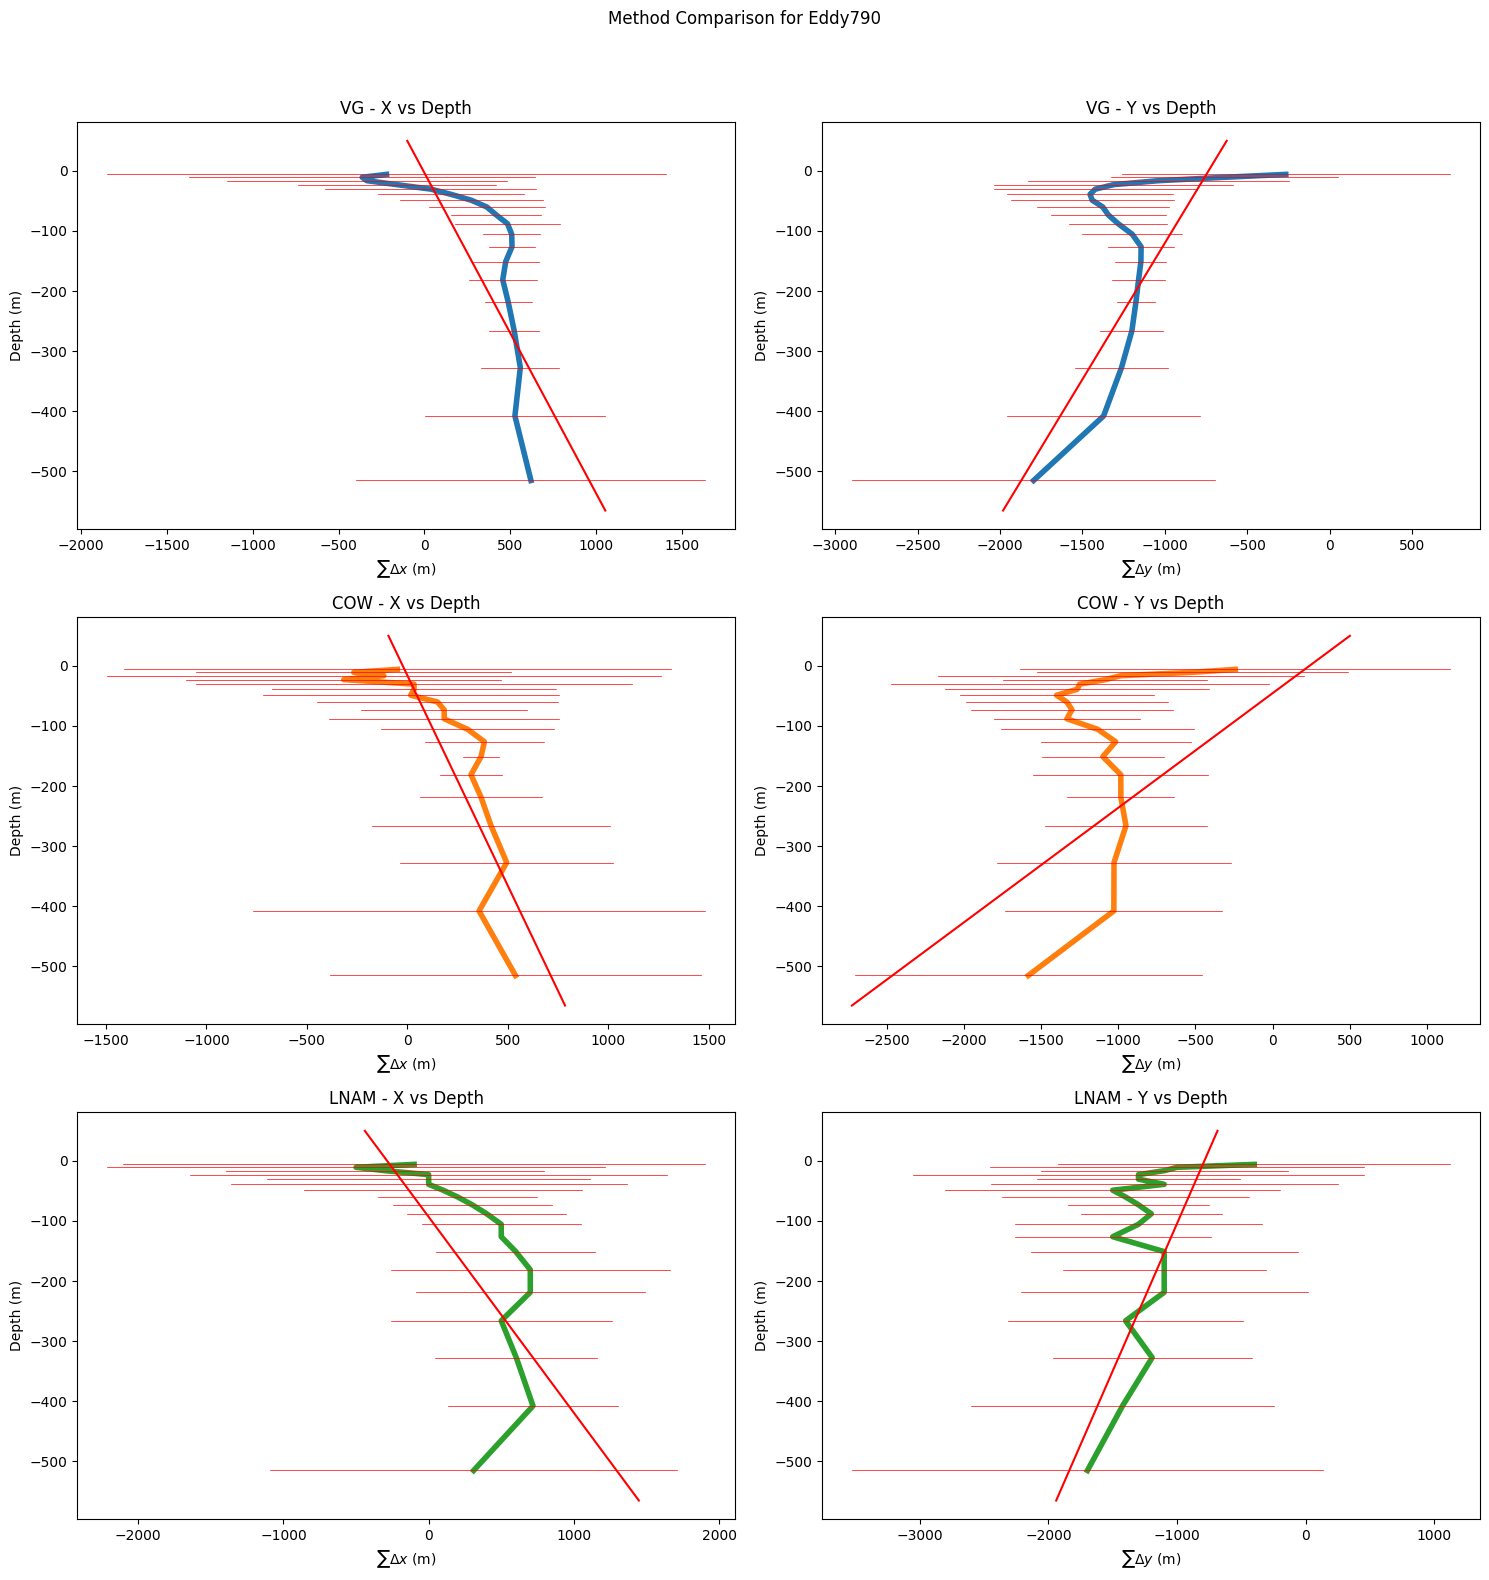

In [172]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Create a 3x2 grid of subplots

colors = plt.cm.tab10.colors
for row, method in enumerate(['VG', 'COW', 'LNAM']):
    
    # create x and y dataframes 
    x_df = pd.DataFrame()
    y_df = pd.DataFrame()
    for t in range(30):
        x_df['T'+str(t)] = frontier_sample_data[eddy]['T'+str(t)][method].iloc[:d_df['T'+str(t)][0]]['x'] - frontier_sample_data[eddy]['T'+str(t)][method].iloc[0]['x']
        y_df['T'+str(t)] = frontier_sample_data[eddy]['T'+str(t)][method].iloc[:d_df['T'+str(t)][0]]['y'] - frontier_sample_data[eddy]['T'+str(t)][method].iloc[0]['y']
    
    # Calculate covariance matrices
    Cz = np.full((2, 2, x_df.shape[0]), np.nan)
    for k in range(1, x_df.shape[0]):
        x = x_df.diff().iloc[k]
        x = x.loc[~np.isnan(x)]
        y = y_df.diff().iloc[k]
        y = y.loc[~np.isnan(y)]
        Cz[:, :, k] = np.cov(np.stack([x.values, y.values]))
    
    # Plot 
    x = x_df.diff().mean(axis=1).cumsum()
    y = y_df.diff().mean(axis=1).cumsum()
    
    # Select the row for each method in the 3x2 plot
    ax_x = axes[row, 0]  # X plot
    ax_y = axes[row, 1]  # Y plot
    
    ax_x.plot(x, z_r[150, 150, :len(x)], linewidth=4, color=colors[row])
    ax_y.plot(y, z_r[150, 150, :len(x)], linewidth=4, color=colors[row])
    
    ellipse_areas = []
    for k in range(len(x)):
        C = Cz[:, :, k]
        eigvals, eigvecs = np.linalg.eigh(C)
        order = eigvals.argsort()[::-1]
        eigvals, eigvecs = eigvals[order], eigvecs[:, order]
        angle = np.arctan2(eigvecs[1, 0], eigvecs[0, 0])
        axis_lengths = np.sqrt(eigvals)
        ellipse_areas.append(np.pi * axis_lengths[0] * axis_lengths[1]) 
        t = np.linspace(0, 2 * np.pi, 100)
        ellipse_points = np.array([np.cos(t), np.sin(t)]) * axis_lengths[:, np.newaxis]
        rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
        ellipse_points = rotation_matrix.dot(ellipse_points)
        
        # Plot ellipses on the respective axes
        ax_x.plot([np.min(ellipse_points[0, :] + x[k]), np.max(ellipse_points[0, :] + x[k])], [z_r[150, 150, k], z_r[150, 150, k]], color='r', linewidth=.5)
        ax_y.plot([np.min(ellipse_points[1, :] + y[k]), np.max(ellipse_points[1, :] + y[k])], [z_r[150, 150, k], z_r[150, 150, k]], color='r', linewidth=.5)
    
    # Interpolation and polynomial fit logic (unchanged)
    arr = [float(x) for x in ellipse_areas[1:]]
    w = 1 - np.array(normalize_list(arr))
    x = x[1:]
    y = y[1:]
    z = z_r[150, 150, 1:len(x)+1]
    
    # Interpolation and polynomial fitting process
    w_original = w
    x_original = x
    y_original = y
    z_original = z
    
    z_new = np.flip(np.linspace(np.min(z), np.max(z), num=100))
    interpolate_func = interp1d(z_original, w_original, kind='linear', fill_value="extrapolate")
    w_new = interpolate_func(z_new)
    interpolate_func = interp1d(z_original, x_original, kind='linear', fill_value="extrapolate")
    x_new = interpolate_func(z_new)
    interpolate_func = interp1d(z_original, y_original, kind='linear', fill_value="extrapolate")
    y_new = interpolate_func(z_new)
    
    w = w_new
    x = x_new
    y = y_new
    z = z_new
    
    z_top = 50
    z_btm = z[-1] - 50
    
    # Fit the polynomial to the entire data (without filtering)
    coefficients_x = np.polyfit(x, z, 1, w=w)
    slope_x, intercept_x = coefficients_x
    
    coefficients_y = np.polyfit(y, z, 1, w=w)
    slope_y, intercept_y = coefficients_y
    
    # Calculate the x and y values corresponding to z_btm and z_top using the line equation
    x_btm = (z_btm - intercept_x) / slope_x
    x_top = (z_top - intercept_x) / slope_x
    
    y_btm = (z_btm - intercept_y) / slope_y
    y_top = (z_top - intercept_y) / slope_y
    
    # Plot the lines for the x vs z and y vs z plots
    ax_x.plot([x_btm, x_top], [z_btm, z_top], color='red')
    ax_y.plot([y_btm, y_top], [z_btm, z_top], color='red')
    
    ax_x.set_xlabel(r'$\sum\Delta x$ (m)')
    ax_y.set_xlabel(r'$\sum\Delta y$ (m)')
    ax_x.set_ylabel('Depth (m)')
    ax_y.set_ylabel('Depth (m)')

    # Set the title for each method
    ax_x.set_title(f'{method} - X vs Depth')
    ax_y.set_title(f'{method} - Y vs Depth')

# Adjust layout for all subplots
plt.tight_layout()
plt.suptitle(f'Method Comparison for {eddy}', y=1.05)
plt.show()
